In [1]:
"""This is video reader with all operations inside fnctions, so they can be called on 
    each frame out of a set of frames, and each video out of a set of videos
    """

"This is the reader, then, that works on multiple frames"

'This is the reader, then, that works on multiple frames'

In [2]:
"""Imports"""
import matplotlib.pyplot as plt #for maknig plots inside the notebook
import skimage
import skvideo.io
from skimage import measure
from skimage.filters import threshold_yen, threshold_isodata
from operator import attrgetter
import numpy as np
from itertools import chain
#import antigravity

In [3]:
"""Functions"""
# read in a file, save the video sequence
def full_avi(filename):
    Vid = skvideo.io.vread(filename)

    fig, ax = plt.subplots(ncols=2)
    ax[0].imshow(Vid[0]) # first fame of video
    ax[1].imshow(Vid[-1]) #last frame of video

    print("Video shape is: ", Vid.shape)
    print("Video length is: ", len(Vid))
    
    return Vid

# take a read video; makeit a 2D matrix
def greens(framelist):
    green = framelist[:, :, :, 2]
    #print("This is the green channel of the image")
    #print("The slice shape is: ", green.shape)
    #plt.imshow(green[1], cmap='Greys_r')
    return green

# apply total thresholding to each of a list of frames; filter slides with wrong number
def total_threshold_filter_0(framelist, indes):
    # returns a new list, different from the orginal
    fll = len(framelist)
    f_indices = []
    f_ap = f_indices.append
    threshed_images = []
    t_ap = threshed_images.append
    m_lab = measure.label
    m_rop = measure.regionprops
    for i in range(fll):
       # print("new_frame")
        frame = framelist[i]
        thresh_img = frame > threshold_yen(frame) # binary image
        img_labelled = m_lab(thresh_img) # contains connected regions
        properties_list = m_rop(img_labelled, coordinates = 'rc') # data about regions, for each connected region
        
        #----------getting maximum connected region----------
        biggest_r = max(properties_list, key = attrgetter('area'))
        """ for k in range(len(properties_list)):
            if areas[k] > biggest_area:
                biggest_r = properties_list[k]
            else:
                pass"""

        #----------------------filter------------------------- can use actual filter
        area_threshold = 1880   # must have enough particles
        convex_threshold = 2500   # convex hull area (> 2500 filtered)  # particles must be in parallelogram
        minor_threshold = 40 # minor_axis length (< filterd) # particles must be in parallelogram
        area_test = biggest_r.filled_area > area_threshold
        shape_test = biggest_r.minor_axis_length > minor_threshold and biggest_r.convex_area < convex_threshold
        
        if area_test and shape_test: # keep frames that have enough paricles, and are not transitions
            f_ap(i) # image's index 
            t_ap((biggest_r)) #([img_labelled])
        else:
            pass   
    filtrate = framelist[f_indices]
    return [(filtrate[i], threshed_images[i], indes[i]) for i in range(len(filtrate))]



Video shape is:  (16123, 256, 256, 3)
Video length is:  16123


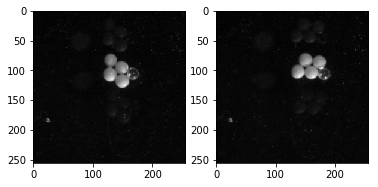

In [4]:
"""Pipeline for videos:"""
# initialize frame list
filename2 = "C:/Users/Tchakamau/Desktop/Soft Matter/tchakamau/New_setup/45701_10Vpp_18_tester.avi"
filename = "C:/Users/Tchakamau/Desktop/Soft Matter/tchakamau/New_setup/45681_10Vpp_25.avi"
frame_vid = full_avi(filename) # making videos ino a frame list
frame_vid_2 = full_avi(filename2) # making videos ino a frame list
#-----------------------------------------------------------------------



In [5]:
"""Preparing test frames for analysis"""

# Indices fortesting
phantom_frames = {"b_r" : [10772, 10912, 10836, 10872, 10958], "broken" : [11130, 11578, 12062, 24673, 26394, 
                                                                           26387, 17288, 21377, 16725],
                  "t_r" : [11918, 12635, 17711, 17579], "t_l" : [16719, 17292, 17289, 17248, 17249],
                  "b_m" : [12133, 18009], "odd_s" : [17271, 16766, 16757, 16333, 15674,15666, 11990, 11973, 11658],
                  "b_l" : [22093, 23813, 26389, 26390, 26391, 26380, 26381, 26388, 26393, 26379, 26383]}

f_indices = [i for y in phantom_frames.values() for i in y]
broken = phantom_frames["broken"]
odd_s = phantom_frames["odd_s"]
#print(broken, odd_s)
#print(f_indices)

print(len(f_indices))
print(len(f_indices) - len(broken) - len(odd_s))


45
27


In [6]:
tf = 26894 
tf2 = 24703
l = list(chain(range(300, 400, 10), 
                          range(2000, 2200, 10), range(4000, 4100, 10), 
               range(6500,6600, 10),
                          range(10000, 10200, 10), range(14000, 14100, 10)))
g = list(range(24703, 6475, -230))
l2 = [tf2 - x for x in g]
l.sort()
l2.sort()
h = l+ l2
print(len(l), len(l2), len(h))

125


(125, 256, 256, 3)


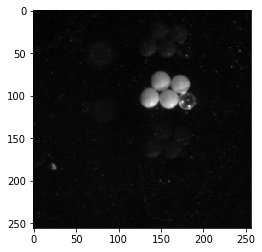

In [7]:
framelist = np.concatenate((frame_vid[l], frame_vid_2[l2]))# will be replaced by full video
plt.imshow(framelist[-1])
print(framelist.shape)

In [8]:
"""Functions"""
# apply total thresholding to each of a list of frames; filter slides with wrong number
def total_threshold_filter(framelist, indes):
    # returns a new list, different from the orginal
    m_lab = measure.label
    m_rop = measure.regionprops
    fll = len(framelist)
    thresh_imgs = [frame > threshold_yen(frame) for frame in framelist]
    imgs_labelled = [m_lab(i) for i in thresh_imgs]
    properties_lists = list(map(lambda im: m_rop(im, coordinates = 'rc'), imgs_labelled))
    biggest_rs = [max(prop_list, key = attrgetter('area')) for prop_list in properties_lists]
    
    area_threshold = 1800   # must have enough particles
    convex_thresholds = (2000, 2680)   # convex hull area (> 2500 filtered)  # particles must be in parallelogram
    minor_thresholds = (38, 48) # minor_axis length (< filterd) # particles must be in parallelogram
    major_thresholds = (61, 75)
        
    f_indices =  [index for index in range(fll) if (biggest_rs[index].filled_area > area_threshold
                 and biggest_rs[index].minor_axis_length > minor_thresholds[0] 
                 and biggest_rs[index].minor_axis_length < minor_thresholds[1] 
                 and biggest_rs[index].convex_area > convex_thresholds[0] 
                 and biggest_rs[index].convex_area < convex_thresholds[1]
                 and biggest_rs[index].major_axis_length > major_thresholds[0]
                 and biggest_rs[index].major_axis_length < major_thresholds[1]
                                                  )] # indices
    

    return [(framelist[i], (biggest_rs[i]), indes[i]) for i in f_indices]




In [9]:
"""Pipeline for lists of frames"""
"""And test thereof (using isinar)"""
def piped0(framelist, h):
    # key variable to be passed into the function is framelist
    green_frames = greens(framelist) # making a green slice
    filtered_frames = total_threshold_filter_0(green_frames, h)
    return filtered_frames

def piped1(framelist, h):
    # key variable to be passed into the function is framelist
    green_frames = greens(framelist) # making a green slice
    filtered_frames = total_threshold_filter(green_frames, h)
    return filtered_frames
    
def isinar(a, als):
    #print(a)
    y = False
    for ele in als:
        #print(ele)
        y = np.array_equal(ele, a)
        if y:
            return y
        else: 
            continue
    return y

print(len(framelist))
#tvf = piped0(framelist, h)
twf = piped1(framelist, h)
print(len(tvf), len(twf))

filts = [[framelist[i][:, :, 2], h[i]] for i in range(len(framelist)) if not isinar(framelist[i][:, :, 2], [k[0] for k in twf])] 
#[j[ :, :, 2] for j in framelist if not isinar(j[:, :, 2], [k[0] for k in twf] )] #jnot in [k[0] for k in twf]]
print(len(filts))

print(twf[0], "jj", filts[0])

125
80 88
37
(array([[13,  5,  5, ...,  2,  0,  4],
       [ 9,  6,  4, ...,  4,  5,  4],
       [ 5,  5,  4, ...,  7,  4,  6],
       ...,
       [ 5,  8, 10, ..., 11,  8, 10],
       [ 6,  9,  4, ...,  9,  7,  7],
       [ 7,  9,  7, ...,  9,  6, 10]], dtype=uint8), <skimage.measure._regionprops._RegionProperties object at 0x0000024CD1D69390>, 300) jj [array([[ 7,  3,  2, ...,  5,  3,  4],
       [ 5,  6,  5, ...,  3,  4,  5],
       [ 3,  0,  5, ...,  6,  4,  3],
       ...,
       [ 4,  7,  8, ...,  9, 10,  8],
       [ 8,  6,  6, ...,  8,  8,  7],
       [ 8,  7,  7, ...,  6,  9,  6]], dtype=uint8), 330]


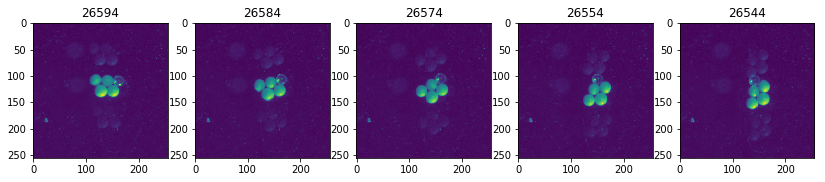

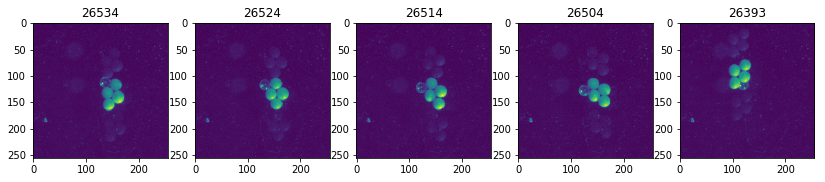

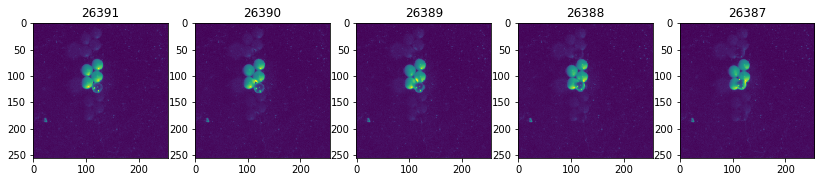

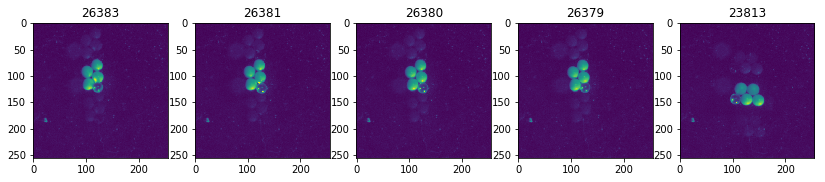

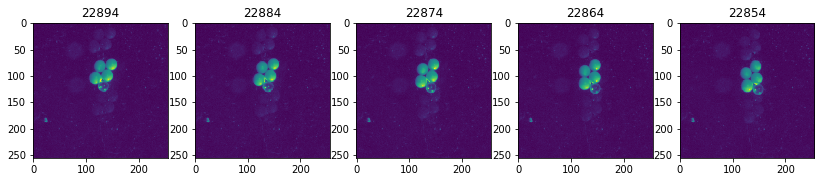

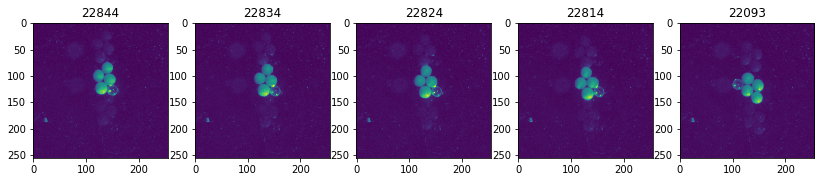

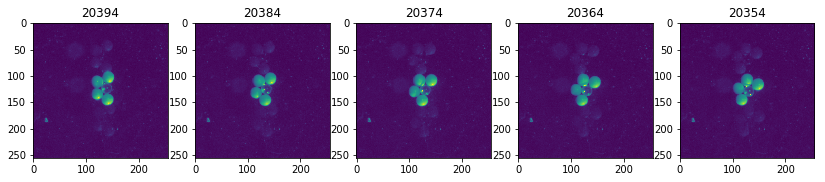

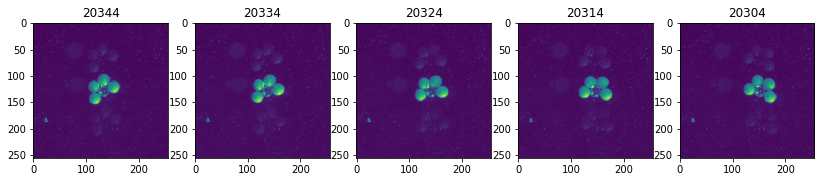

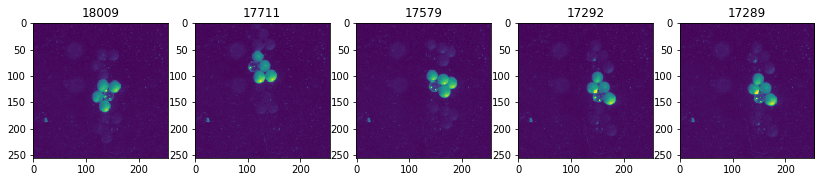

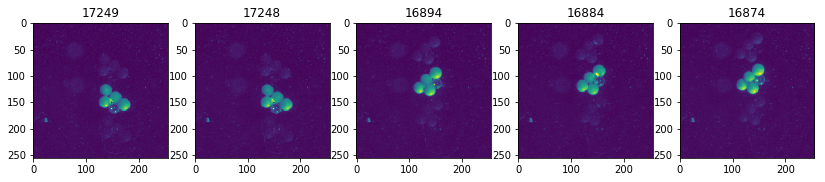

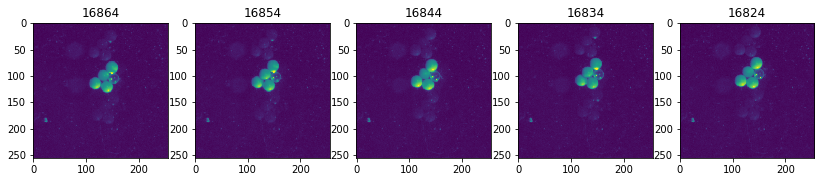

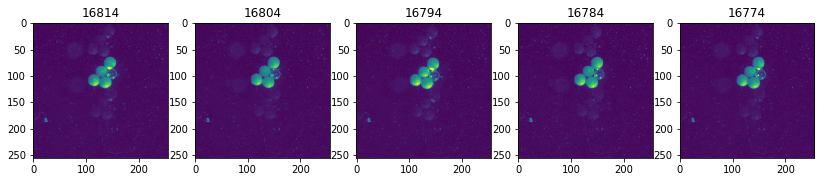

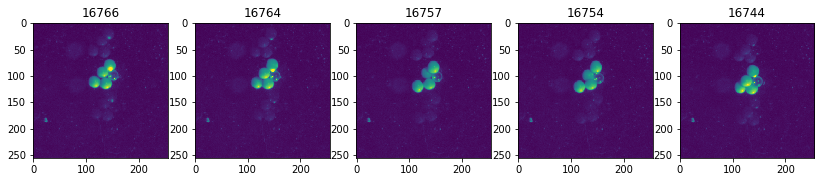

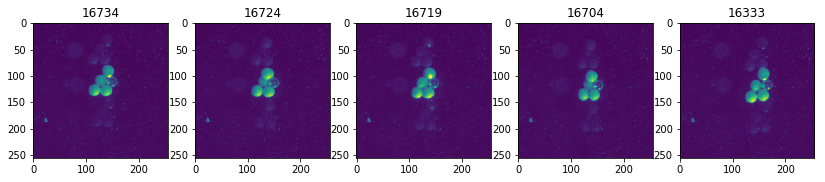

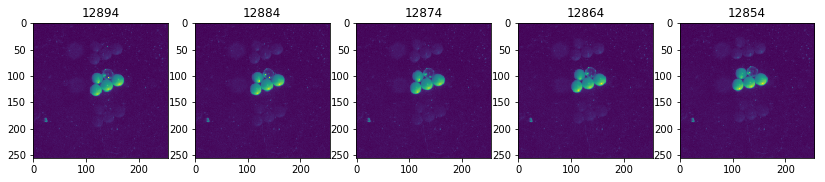

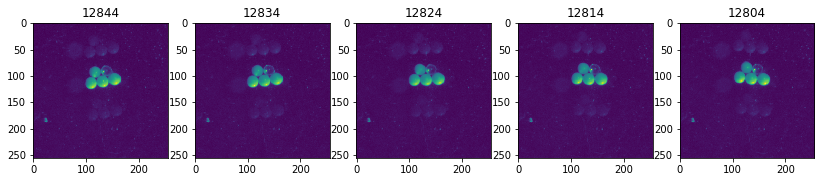

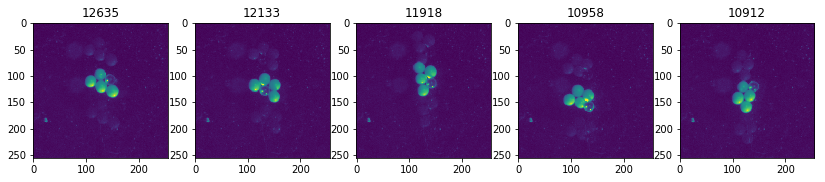

In [10]:
c = 5
r = len(twf)// c
for j in range(r):
    fig, ax = plt.subplots(ncols=c, figsize = (14, 10))
    for k in range(c):
        ax[k].set_title(tf - twf[j * c + k][2])
        ax[k].imshow(twf[j * c + k][0])
    
    

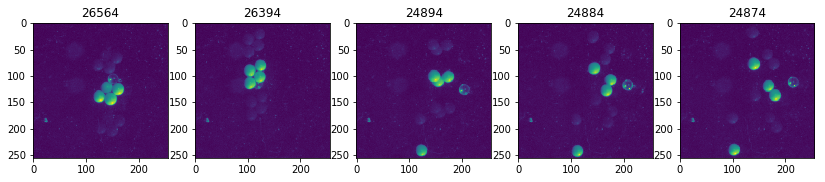

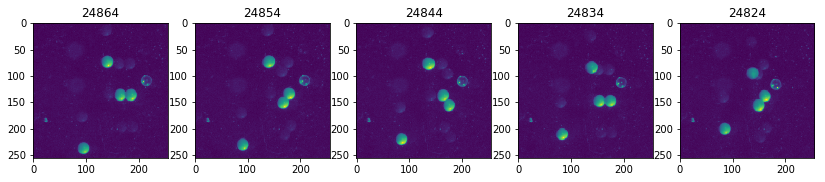

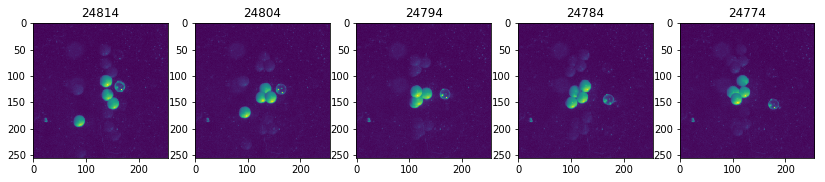

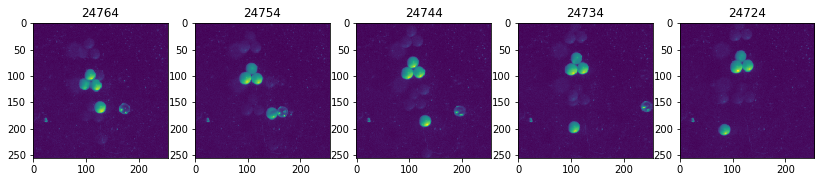

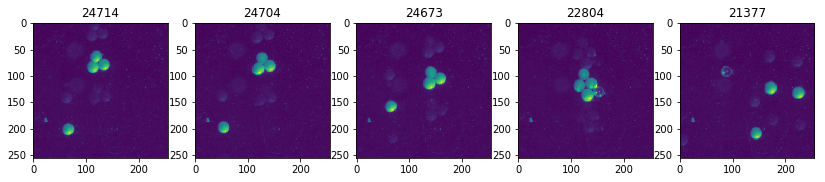

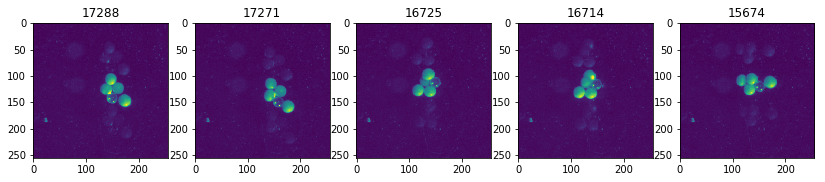

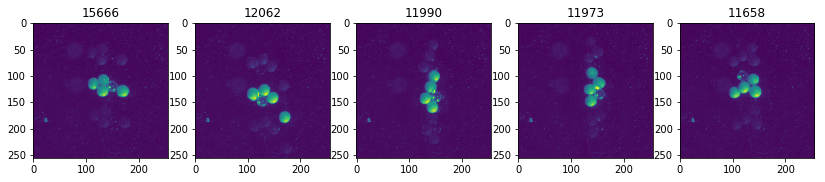

In [11]:
c = 5
r = len(filts)// c
for j in range(r):
    fig, ax = plt.subplots(ncols=c, figsize = (14, 10))
    for k in range(c):
        ax[k].set_title(tf - filts[j * c + k][1])
        ax[k].imshow(filts[j * c + k][0])

"Applying to real video"
%timeit -n 10 piped0(framelist, h)
%timeit -n 10 piped1(framelist, h)

"Write the filtered video"
skvideo.io.vwrite("avi_25_filtered.avi", filtered_vid)


skvideo.io.vwrite("test_frames_filtered.avi", test_vid_filtrate)

In [13]:
print(5)

5
